<a href="http://landlab.github.io"><img style="float: left" src="https://raw.githubusercontent.com/landlab/tutorials/master/landlab_header.png"></a>

# Modeling Hillslopes and Channels with Landlab
The original version of this exercise was donated by Andy Wickert at the University of Minnesota.

<hr>
<small> For instructions on how to run an interactive IPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/master/README.md">https://github.com/landlab/tutorials/blob/master/README.md</a></small><br>
<small>For tutorials on learning Landlab, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

** What is this notebook? **

This notebook illustrates a landscape evolution model in which the landscape evolves according to the equation:

\begin{equation}
 \frac{\partial z}{\partial t} = -K_\text{sp} A^{m_{sp}} S^{n_{sp}} + K_\text{hs} \frac{\partial^2 z}{\partial x^2} + U
\end{equation}
Here, $K$ are coefficients on the fluvial (_sp_) and hillslope (_hs_) parts of the equation, and $m_{sp}$ and $n_{sp}$ are positive exponents, usually thought to have a ratio, $m_{sp}/n_{sp} \approx 0.5$. $A$ is drainage area and $S$ is the slope of steepest descent ($-\frac{dz}{dx}$) where $x$ is horizontal distance (positive in the downslope direction) and $z$ is elevation. (If slope is negative there is no fluvial erosion.) $U$ is an externally-applied uplift field.

The first term on the right hand side of the equation is the fluvial erosion term, which is also known as the stream power equation. The second term on the right hand side of the equation is elevation changes via linear diffusion, and linear diffusion is one way in which to describe hillslope sediment transport.

** What will you do? **

In this exercise you will modify the code to get a better understanding of how different processes and forces control landscape evolution, landscape form and drainage density (as interpreted from slope-area data). It is expected that you have already learned that basics about fluvial bedrock incision (and the stream power equation) and sediment transport through creep on hillslopes (and the diffusion equation).

Start by sequentially running each code block without changing anything. At the end of the notebook you will see the questions that you need to answer by changing parts of the code and rerunning it. 

Remember that you can always go to the _Kernel_ pulldown menu at the top and choose _Restart & Clear Output_ or _Restart & Run All_ if you change things and want to start afresh. If you just change one code block and rerun only that code block, only the parts of the code in that code block will be updated. (E.g. if you change parameters but don't reset the code blocks that initialize run time or topography, then these values will not be reset.)

** Questions to answer before starting this assignment. **

1. If hillslope diffusivity ($K_{hs}$) is fixed, but fluvial erodibility increases ($K_{sp}$), what do you think will happen to the total relief and drainage density of a landscape.

** Now on to the code... **

First we have to import the parts of Python and Landlab that are needed to run this code. You should not have to change this first code block.

In [1]:
# Code Block 1

import numpy as np
from landlab import RasterModelGrid, HexModelGrid
from landlab.components import StreamPowerEroder, FlowRouter, \
     LinearDiffuser, DepressionFinderAndRouter
from landlab import imshow_grid
from matplotlib import pyplot as plt
#below is to make plots show up in the notebook
%matplotlib inline 

** Now we set parameters **

This part you will need to change for the different exercises. 

Note that Landlab does not impose units, but it assumes that all units are consistent. We will assume that everything is given in _meters_ (m) and _years_ (yr).

In [2]:
# Code Block 2

uplift_rate = 0.001  # [m/yr], initially set at 0.001
K_sp = 1.e-5  # units vary depending on m_sp and n_sp, initially set at 1e-5
m_sp = 0.5 # exponent on drainage area in stream power equation, initially 0.5
n_sp = 1. # exponent on slope in stream power equation, initially 1.
K_hs = 0.05  # [m^2/yr], initially 0.05

** Make a grid. **

This part you may want to change.

In [3]:
# Code Block 3

ncells_side = 150 # number of raster cells on each side, initially 150
dxy  = 50 # side length of a raster model cell, or resolution [m], initially 50

# Below is a raster (square cells) grid, with equal width and height 
mg = RasterModelGrid((ncells_side, ncells_side), dxy)

# Below is a Hexagonal grid (hexagonal cells, 
# with equal width and height (a square)
#mg = HexModelGrid(ncells_side, ncells_side, dxy, shape='rect')

# Below is a hexagonal grid (hexagonal cells), 
# in which the grid is also a hexagon
#mg = HexModelGrid(ncells_side, ncells_side/2, dxy, shape='hex')

Set some variables related to time. 

In [4]:
# Code Block 4

dt = 5000 # time step [yr], initially 5000
total_time = 0 # amount of time the landscape has evolved [yr]
tmax = 1E6  # time for the model loop to run [yr], initially 1e6

t = np.arange(0, tmax, dt) # each of the time steps that the code will run

Here we make the initial grid of elevation. 

In [5]:
# Code Block 5

np.random.seed(0) # seed set to zero so our figures are reproducible
mg_noise = np.random.rand(mg.number_of_nodes)/1000. # intial noise on elevation gri

# set up the elevation on the grid
zr = mg.add_zeros('node', 'topographic__elevation')
zr += mg_noise

Intializing all of the process components that do the work.

In [6]:
# Code Block 6

frr = FlowRouter(mg) # intializing flow routing
spr = StreamPowerEroder(mg, K_sp=K_sp, m_sp=m_sp, n_sp=n_sp, threshold_sp=0,
                        use_Q=None) #initializing stream power incision
dfn = LinearDiffuser(mg, linear_diffusivity=K_hs, deposit = False) # initializing linear diffusion
#df = DepressionFinderAndRouter(mg) # Initializing the pit finder

Now for the code loop. Note that you can rerun this code block many times, and as long as you don't rerun any of the code boxes above, it will take the already evolved landscape and evolve it even more.

In [7]:
# Code Block 7

for ti in t:
    zr[mg.core_nodes] += uplift_rate*dt # uplift the landscape
    dfn.run_one_step(dt) # diffuse the landscape
    frr.run_one_step() # route flow
    #df.map_depressions()
    spr.run_one_step(dt) # fluvial incision
    total_time += dt # update time keeper
    print total_time
    
print 'maximum elevation is ', np.max(zr)

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
715000
720000
725000
73000

Plot the topography.

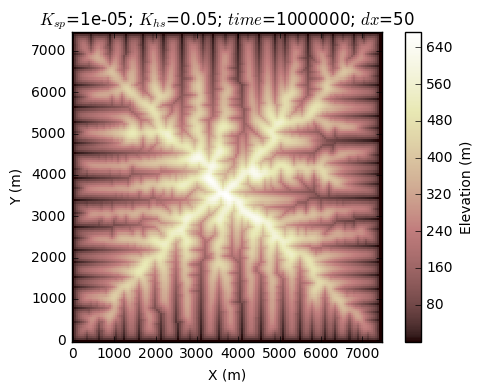

In [8]:
# Code Block 8

plt.figure(1)
imshow_grid(mg, 'topographic__elevation', grid_units=('m', 'm'),
                var_name='Elevation (m)')
title_text = '$K_{sp}$='+str(K_sp) + '; $K_{hs}$='+str(K_hs) + '; $time$='+str(total_time) + '; $dx$='+str(dxy)
plt.title(title_text)

Plot the slope and area data at each point (in log-log space).

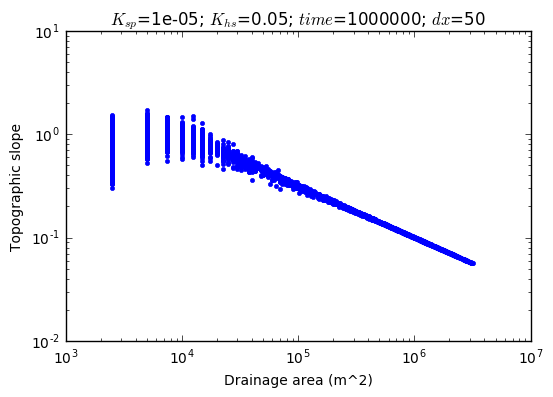

In [9]:
# Code Block 9

plt.figure(2)
indices = np.where(mg.status_at_node[mg.at_node['flow__receiver_node']] == 0)
plt.loglog(mg.at_node['drainage_area'][indices],
           mg.at_node['topographic__steepest_slope'][indices], 'b.')
#xlim([1.e3, 1.e7])
plt.ylabel('Topographic slope')
plt.xlabel('Drainage area (m^2)')
plt.title(title_text)

Answer the following questions using the code above. All solutions should be typed, and supporting figures (produced using the code) should be embedded in your final document. (Download or screenshoot the figures.) You may want to make other plots with the data you collect using this model. You are free to make those plots using whatever software you choose.

In parts of this exercise you need to work with your classmates. You are encouraged to discuss how to use the model and model results with your classmates, however the write-up that you hand in must be your own work.

1. **Hillslope vs. Fluvial Processes. ** Using the parameters provided in the initial notebook, run the landscape to steady state, or the point at which the topography and the slope-area relationship stop changing (i.e. erosion equals rock uplift). (You can keep rerunning Code Block 7 until steady state is reached. Steady state is reach asymptotically, so exact steady state is less important than very close.) Use the plots of slope and area to estimate where the hillslope–fluvial transition is (or in otherwords, the threshold drainage area for channel heads). Also record the maximum elevation. Now try keeping $K_{sp}$ the same but increase and decrease $K_{hs}$ (change and run Code Block 2, then rerun Code Block 6). How do the maximum elevation and the transition from hillslope to channel change with changes in $K_{hs}$? Now try keeping $K_{hs}$ the same but increase and decrease $K_{sp}$ (change and run Code Block 2, then rerun Code Block 6). How do the maximum elevation and transition from hillslope to channel change with changes in $K_{sp}$? You can work in teams with your classmates so that you can explore more parameter combinations. Produce a relationship between the different values of $K_{sp}$, $K_{hs}$ and the threshold drainage area and maximum elevation. Remember to run all of your different parameter values to steady state before estimating the threshold drainage area and maximum elevation. Describe how the different parameters affect drainage density in words, and how this is seen in the relationship that you generate. You do not have to include plots of every single run, but include plots to illustrate at least three landscapes with different drainage densities.

2. **Uplift and erosion. ** Now, perform a similar set of exercises as you did in exercise 1, but also systematically vary uplift rate. Work in teams, and each person should choose two combinations of $K_{sp}$ and $K_{hs}$ and three uplift rates (for a total of 6 runs). Make sure the values that you choose do not overlap with your group members. This time make sure you document the transition from hillslope to fluvial process, and also note the maximum steady state elevation for each combination of uplift, $K_{sp}$ and $K_{hs}$. Produce relationships to show how the threshold and maximum elevation change with the different variables. Describe how uplift rate affects drainage density in words, and how this is seen in the relationship that you generate. You do not have to include plots of every single run, but include some plots to illustrate the changes that you describe.

3. ** Landscapes evolving to steady state. ** Try changing the grid size (Code Block 3) and rerun all the code blocks sequentially. Keep running the time loop (Code Block 7) until it reaches steady state and record the time it takes to get to steady state. Now trying changing the rock uplift rate (Code Block 2), rerun ALL the code blocks sequentially, and the keep running the time loop (Code Block 7) until the landscape reaches steady state again (record the time). Change the resolution (i.e. the cell size, Code Block 3) and follow the same procedure (rerun everything, then run until steady state). Combine in groups to gather enough model outputs to form relationships between time to steady state and grid size, resolution, or  rock uplift rate. Describe in words how the different parameters and model domain set-ups affect the time to steady state. Describe how this does or does not make sense physically. Include any necessary plots that help you to describe your answers.

4. ** Free-form exploration. ** Try changing the grid type (Code Block 3), grid size (Code Block 3), stream power exponents (Code Block 2), distribution of uplift rate (e.g., what happens if you have just part of the landscape experience uplift, a bit trickier, as uplift in Code Block 2 will need to be changed to an array), etc. Based on what you observe, create a consistent geomorphic history of the system. Creativity is expected here!